In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
import warnings


In [4]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [6]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [7]:
x=preprocessor.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [15]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRFRegressor":XGBRFRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print("-Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------------------------------------')

    print('Model performance for test set')
    print("-Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for training set
-Root Mean Squared Error:5.2815
-Mean Absolute Error:4.2276
-R2 Score: 0.8789
------------------------------------------------------------
Model performance for test set
-Root Mean Squared Error:5.5719
-Mean Absolute Error:4.3948
-R2 Score: 0.8630


Lasso
Model performance for training set
-Root Mean Squared Error:6.6102
-Mean Absolute Error:5.1990
-R2 Score: 0.8104
------------------------------------------------------------
Model performance for test set
-Root Mean Squared Error:6.7021
-Mean Absolute Error:5.3566
-R2 Score: 0.8018


Ridge
Model performance for training set
-Root Mean Squared Error:5.2818
-Mean Absolute Error:4.2268
-R2 Score: 0.8789
------------------------------------------------------------
Model performance for test set
-Root Mean Squared Error:5.5674
-Mean Absolute Error:4.3880
-R2 Score: 0.8632


K-Neighbors Regressor
Model performance for training set
-Root Mean Squared Error:5.8034
-Mean Absolute Error:4.6020

Result

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.863213
0,LinearRegression,0.862993
6,XGBRFRegressor,0.860585
5,Random Forest Regressor,0.858481
7,CatBoosting Regressor,0.857797
8,AdaBoost Regressor,0.816429
1,Lasso,0.801773
3,K-Neighbors Regressor,0.790108
4,Decision Tree,0.740205


Linear Regression

In [17]:
lin_model=LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy is %.2f" %score)

Accuracy is 86.30


Text(0, 0.5, 'Predicted')

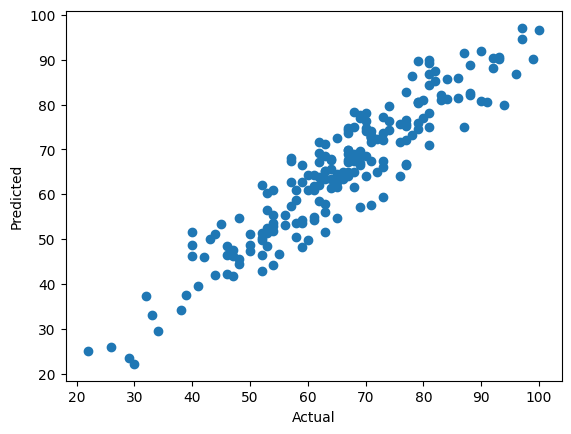

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

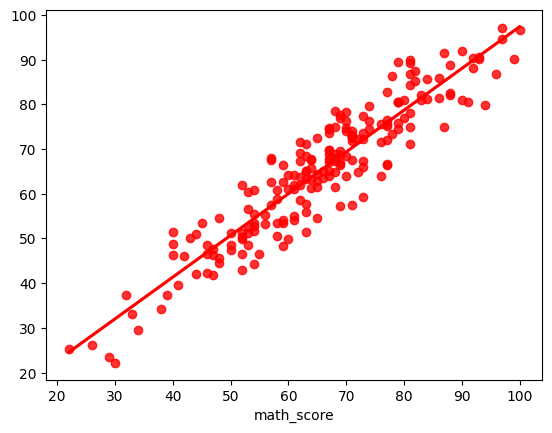

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')